# Supernovae simulation

## Imports

In [1]:
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
from importlib import import_module
import yaml
import pprint

## Choose parameters for the simulation

In [2]:
configFile = '../input/param_simulation_nb.yaml'
config = yaml.load(open(configFile),Loader=yaml.FullLoader) #configuration dict - mandatory for the run

## dbFile choice

In [22]:
dbName = 'euclidddf_v1.4_10yrs'
dbFile = '/home/philippe/LSST/DB_Files/{}.db'.format(dbName)
opsimdb = db.OpsimDatabase(dbFile)
version = opsimdb.opsimVersion
config['Observations']['filename']=dbFile
config['ProductionID']=dbName
config['Observations']['season']=2
pprint.pprint(config)

{'Cosmology': {'H0': 72.0,
               'Model': 'w0waCDM',
               'Omega_l': 0.7,
               'Omega_m': 0.3,
               'w0': -1.0,
               'wa': 0.0},
 'Display_LC': {'display': False, 'time': 1},
 'Host Parameters': 'None',
 'Instrument': {'aerosol': False,
                'airmass': 1.2,
                'atmos': True,
                'atmos_dir': 'THROUGHPUTS_DIR',
                'name': 'LSST',
                'throughput_dir': 'LSST_THROUGHPUTS_BASELINE'},
 'Metric': 'sn_mafsim.sn_maf_simulation',
 'Multiprocessing': {'nproc': 1},
 'Observations': {'coadd': True,
                  'fieldtype': 'DD',
                  'filename': '/home/philippe/LSST/DB_Files/euclidddf_v1.4_10yrs.db',
                  'season': 2},
 'Output': {'directory': 'Output_Simu', 'save': True},
 'Pixelisation': {'nside': 64},
 'ProductionID': 'euclidddf_v1.4_10yrs',
 'SN parameters': {'Id': 100,
                   'absmag': -19.0906,
                   'band': 'bessellB',
       

## Define slicer

In [23]:
slicer = slicers.HealpixSlicer(nside=config['Pixelisation']['nside'])

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


## Prepare for run and run

In [24]:
fieldtype = config['Observations']['fieldtype'] #field type (WFD or DD)
propinfo, proptags = opsimdb.fetchPropInfo()
print('proptags and propinfo', proptags, propinfo)

sqlconstraint = opsimdb.createSQLWhere(fieldtype, proptags)
       
#sqlconstraint = opsimdb.createSQLWhere(5,proptags)
    
# Simulator instance
module = import_module(config['Metric'])
metric = module.SNMetric(
            config=config, coadd=config['Observations']['coadd'])

# metric bundle
mb = metricBundles.MetricBundle(metric, slicer, sqlconstraint)
mbD = {0: mb}
outMAFDir = 'OutputMAF'
resultsDb = db.ResultsDb(outDir=outMAFDir)

mbg = metricBundles.MetricBundleGroup(mbD, opsimdb,
                                              outDir=outMAFDir, resultsDb=resultsDb)

mbg.runAll()

#this is to save metadata in a separate file
if metric.save_status:
    metric.simu.Finish()


proptags and propinfo {'WFD': [1], 'DD': [2, 3, 4, 5, 6], 'NES': []} {0: 'Other', 1: 'WFD', 2: 'DD:ELAISS1', 3: 'DD:ECDFS', 4: 'DD:EDFS', 5: 'DD:COSMOS', 6: 'DD:XMM-LSS'}
Querying database SummaryAllProps with constraint (proposalId = 2 or proposalId = 3 or proposalId = 4 or proposalId = 5 or proposalId = 6) for columns ['night', 'filter', 'fieldRA', 'seeingFwhmGeom', 'observationId', 'seeingFwhmEff', 'fiveSigmaDepth', 'fieldDec', 'visitTime', 'observationStartMJD', 'numExposures', 'visitExposureTime']
Found 207275 visits
Running:  [0]
Number of SN to simulate: 19
End of simulation 9.152241706848145
Number of SN to simulate: 19
End of simulation 9.682381629943848
End of simulation 2.5033950805664062e-05
Number of SN to simulate: 19
End of simulation 11.484647750854492
Number of SN to simulate: 19
End of simulation 10.77931547164917
Number of SN to simulate: 19
End of simulation 12.026406526565552
Number of SN to simulate: 19
End of simulation 12.4089674949646
Number of SN to simulate: 

In [25]:
ls Output_Simu

LC_euclidddf_v1.4_10yrs.hdf5  Simu_euclidddf_v1.4_10yrs.hdf5


Two files are generated:
- Simu_*.hdf5: summary of the generated LC = list of parameters used for generation
- LC_*.hdf5: light curves 

## Output analysis

In [26]:
%matplotlib notebook
import matplotlib.pylab as plt
import h5py
import numpy as np
from astropy.table import Table

### Parameter file

In [27]:
paramFile = '{}/Simu_{}.hdf5'.format(config['Output']['directory'],config['ProductionID'])
f = h5py.File(paramFile, 'r')
print(f.keys(),len(f.keys()))
for i, key in enumerate(f.keys()):
    params = Table.read(paramFile, path=key)
    
# params is an astropy table
print(params[:10])
print(type(params),params.dtype)

<KeysViewHDF5 ['summary']> 1
SNID         Ra                Dec         ... fieldid n_lc_points survey_area
---- ------------------ ------------------ ... ------- ----------- -----------
 201 150.05032574006236 2.7962961820558037 ...     100           1         9.6
 202 150.05032574006236 2.7962961820558037 ...     100           4         9.6
 203 150.05032574006236 2.7962961820558037 ...     100           3         9.6
 204 150.05032574006236 2.7962961820558037 ...     100           3         9.6
 205 150.05032574006236 2.7962961820558037 ...     100           3         9.6
 206 150.05032574006236 2.7962961820558037 ...     100           1         9.6
 207 150.05032574006236 2.7962961820558037 ...     100           2         9.6
 208 150.05032574006236 2.7962961820558037 ...     100           4         9.6
 209 150.05032574006236 2.7962961820558037 ...     100           4         9.6
 211 150.05032574006236 2.7962961820558037 ...     100           2         9.6
<class 'astropy.table.t

In [28]:
def plotParameters(fieldname, fieldid, tab, season):
    """ Plot simulation parameters
    parameters ('X1', 'Color', 'DayMax', 'z')
    Input
    ---------
    fieldname: (DD or WFD)
    fieldid: (as given by OpSim)
    tab: recarray of parameters
    season: season

    Returns
    ---------
    Plot (x1,color,dayMax,z)
    """

    idx = tab['season'] == season
    sel = tab[idx]
    thesize = 15
    toplot = ['x1', 'color', 'daymax', 'z']
    fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10, 9))
    title= '{} - fieldid {} - season {}'.format(fieldname,fieldid,season)
    fig.suptitle(title, fontsize=thesize)

    for i, var in enumerate(toplot):
        ix = int(i/2)
        iy = i % 2
        axis = ax[ix][iy]
        i#f var != 'z':
        axis.hist(sel[var],histtype='step') #bins=len(sel[var]))
        axis.set_xlabel(var, fontsize=20)
        axis.set_ylabel('Number of entries', fontsize=thesize)
        axis.tick_params(axis='x', labelsize=thesize)
        axis.tick_params(axis='y', labelsize=thesize)

fieldname
---------
       DD 100 SNID         Ra                Dec         ... fieldid n_lc_points survey_area
---- ------------------ ------------------ ... ------- ----------- -----------
 201 150.05032574006236 2.7962961820558037 ...     100           1         9.6
 202 150.05032574006236 2.7962961820558037 ...     100           4         9.6
 203 150.05032574006236 2.7962961820558037 ...     100           3         9.6
 204 150.05032574006236 2.7962961820558037 ...     100           3         9.6
 205 150.05032574006236 2.7962961820558037 ...     100           3         9.6
 206 150.05032574006236 2.7962961820558037 ...     100           1         9.6
 207 150.05032574006236 2.7962961820558037 ...     100           2         9.6
 208 150.05032574006236 2.7962961820558037 ...     100           4         9.6
 209 150.05032574006236 2.7962961820558037 ...     100           4         9.6
 211 150.05032574006236 2.7962961820558037 ...     100           2         9.6
 ...              

<IPython.core.display.Javascript object>


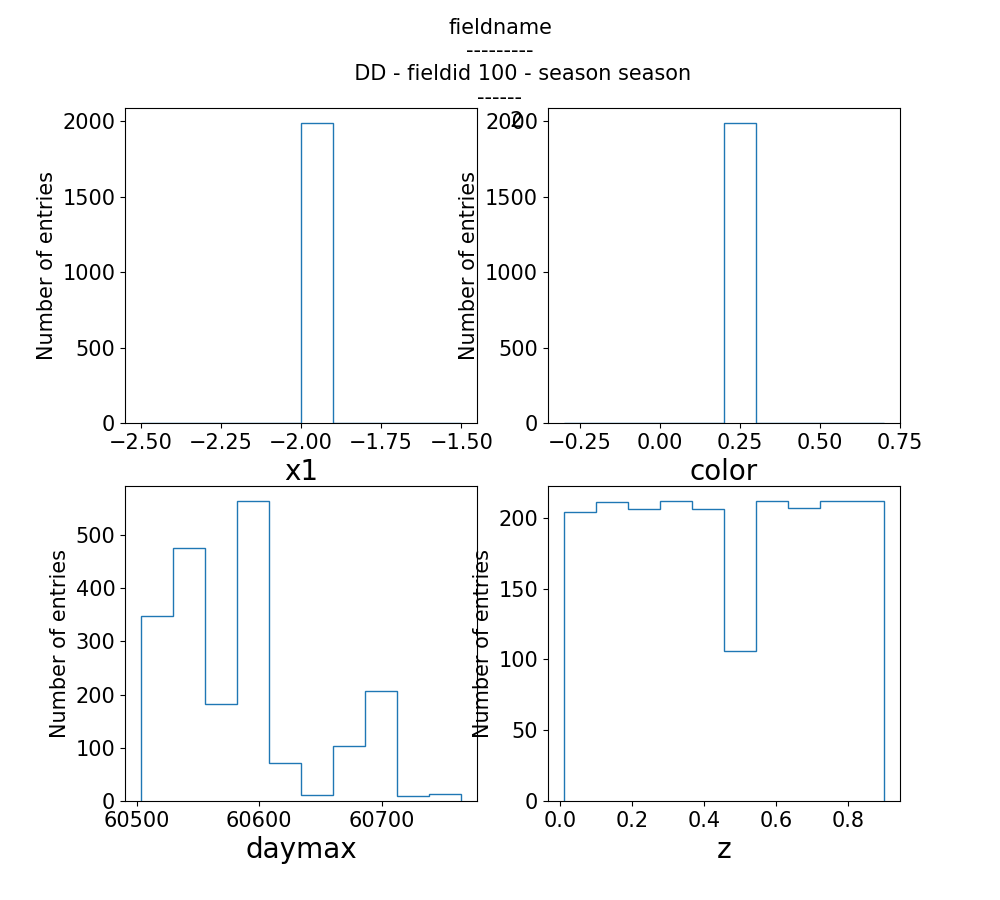

In [29]:
for fieldid in np.unique(params['fieldid']):
    idx = params['fieldid']==fieldid
    field = params[idx]
    fieldname = np.unique(field['fieldname'])
    season = np.unique(field['season'])
    print(fieldname,fieldid,field,season)
    plotParameters(fieldname,fieldid,field,season)
plt.show()

### Light curves

In [30]:
def plotLC(table,ax,band_id, inum = 0):
    fontsize = 10
    plt.yticks(size=fontsize)
    plt.xticks(size=fontsize)
    for band in 'ugrizy':
        i = band_id[band][0]
        j = band_id[band][1]
        #ax[i,j].set_yscale("log")
        idx = table['band'] == 'LSST::'+band
        sel = table[idx]
        #print('hello',band,inum,len(sel))
        #ax[band_id[band][0]][band_id[band][1]].errorbar(sel['time'],sel['mag'],yerr = sel['magerr'],color=colors[band])
        ax[i,j].errorbar(sel['time'],sel['flux_e'],yerr = sel['flux_e']/sel['snr_m5'],
                         markersize=200000.,color=colors[band],linewidth=1)
        if i > 1:
            ax[i,j].set_xlabel('MJD [day]',{'fontsize': fontsize})
        ax[i,j].set_ylabel('Flux [pe/sec]',{'fontsize': fontsize})
        ax[i,j].text(0.1, 0.9, band, horizontalalignment='center',
             verticalalignment='center', transform=ax[i,j].transAxes)


In [31]:
lcFile = '{}/LC_{}.hdf5'.format(config['Output']['directory'],config['ProductionID'])
f = h5py.File(lcFile, 'r')
print(f.keys(),len(f.keys()))

<KeysViewHDF5 ['lc_1000', 'lc_1001', 'lc_1002', 'lc_1003', 'lc_1004', 'lc_1005', 'lc_1006', 'lc_1007', 'lc_1008', 'lc_1009', 'lc_101', 'lc_1010', 'lc_1011', 'lc_1012', 'lc_1013', 'lc_1014', 'lc_1015', 'lc_1016', 'lc_1017', 'lc_1018', 'lc_1019', 'lc_102', 'lc_1020', 'lc_1021', 'lc_1022', 'lc_1023', 'lc_1024', 'lc_1025', 'lc_1026', 'lc_1027', 'lc_1028', 'lc_1029', 'lc_103', 'lc_1030', 'lc_1031', 'lc_1032', 'lc_1033', 'lc_1034', 'lc_1035', 'lc_1036', 'lc_1037', 'lc_1038', 'lc_1039', 'lc_104', 'lc_1040', 'lc_1041', 'lc_1042', 'lc_1043', 'lc_1044', 'lc_1045', 'lc_1046', 'lc_1047', 'lc_1048', 'lc_1049', 'lc_105', 'lc_1050', 'lc_1051', 'lc_1052', 'lc_1053', 'lc_1054', 'lc_1055', 'lc_1056', 'lc_1057', 'lc_1058', 'lc_1059', 'lc_106', 'lc_1060', 'lc_1061', 'lc_1062', 'lc_1063', 'lc_1064', 'lc_1065', 'lc_1066', 'lc_1067', 'lc_1068', 'lc_1069', 'lc_107', 'lc_1070', 'lc_1071', 'lc_1072', 'lc_1073', 'lc_1074', 'lc_1075', 'lc_1076', 'lc_1077', 'lc_1078', 'lc_1079', 'lc_108', 'lc_1080', 'lc_1081', 'lc

<IPython.core.display.Javascript object>


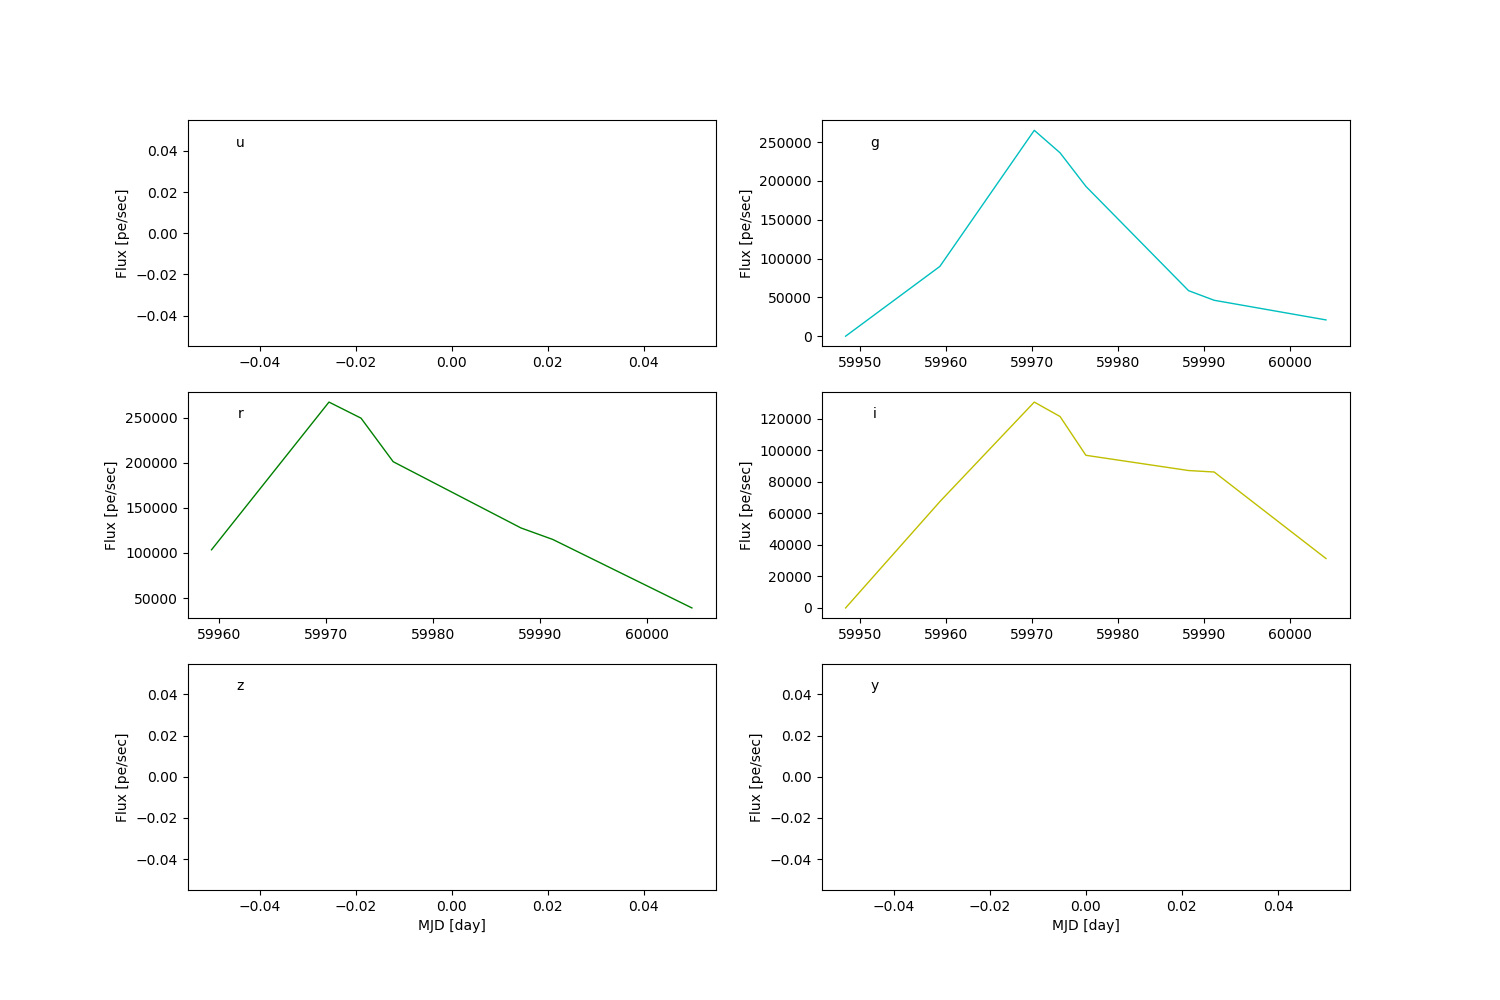

OrderedDict([('Dec', 2.8364990000000003),
             ('Ra', 150.36235499999995),
             ('SNID', 201),
             ('color', 0.2),
             ('daymax', 59968.51957175926),
             ('epsilon_color', 0.0),
             ('epsilon_x0', 0.0),
             ('epsilon_x1', 0.0),
             ('index_hdf5', 101),
             ('survey_area', 9.6),
             ('x0', 0.019793133994619887),
             ('x1', -2.0),
             ('z', 0.01)])
         flux                 fluxerr         ...        phase       
---------------------- ---------------------- ... -------------------
 4.110289289841849e-09 2.9696842057274817e-08 ... -19.992459662632363
1.6288799796876894e-08  5.027949412891584e-08 ...  -19.98491932526761
 0.0020688682498783573  2.661196187629067e-07 ...  -9.145970847085925
 0.0015294136484127927 3.0019394156913705e-07 ...  -9.138430509713967
  0.001834098857852674 2.9418697122029007e-07 ...  -9.130890172349213
 0.0053430200105159505  4.226962211653069e-07 ...  1.72

In [15]:
fig, ax = plt.subplots(ncols=2, nrows=3,figsize=(15,10))
bands='ugrizy'
band_id = dict(zip(bands,[(0,0),(0,1),(1,0),(1,1),(2,0),(2,1)]))
colors = dict(zip(bands,'bcgyrm'))
for i, key in enumerate(f.keys()):
    lc = Table.read(lcFile, path=key)
    pprint.pprint(lc.meta) # metadata
    print(lc) # light curve points
    plotLC(lc,ax,band_id,i)
    break